In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [106]:
fish_market_dataset_url = 'https://raw.githubusercontent.com/Ankit152/Fish-Market/main/Fish.csv'
fish_market_df = pd.read_csv(fish_market_dataset_url)
fish_market_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [107]:
fish_market_df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [108]:
#class_values = ["Perch", "Pike", "Smelt"]
#fish_market_df = fish_market_df.apply(lambda row: row[fish_market_df['Species'].isin(class_values)])
#fish_market_df

In [109]:
classification_target = fish_market_df.pop('Species')
regression_target = fish_market_df.pop('Weight')

In [110]:
le = LabelEncoder()
le.fit(classification_target)
X, y = fish_market_df.values, le.transform(classification_target)
print(" Classes:",le.classes_, '\n', "Valores:", le.transform(le.classes_))

 Classes: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 
 Valores: [0 1 2 3 4 5 6]


In [111]:
model = LogisticRegression(max_iter=1000)
model.fit(X=X, y=y)
score = model.score(X, y)
print("Model Score:", score)

y_pred = model.predict(X)
mse = mean_squared_error(y_true=y, y_pred=y_pred)
print("MSE:", mse)

intercept_ = model.intercept_
coef = model.coef_
print("Intercept:", intercept_)
print("Coef:", coef)

Model Score: 0.9748427672955975
MSE: 0.1320754716981132
Intercept: [-11.42576493   6.38711473   4.34482746  -8.41525505   3.31552622
   9.91314367  -4.1195921 ]
Coef: [[-0.82676716 -0.57926665  1.12555363  1.6916792  -0.23881088]
 [ 0.01407991 -0.17323157 -0.60802424  1.8911529  -0.12631791]
 [ 0.83851221  2.0150381  -2.64519744 -0.40364846  1.10059174]
 [ 0.22398818  0.19668567  0.33059397 -1.33027047 -0.58497865]
 [ 0.05677666 -1.47675059  1.35593813 -0.40272563  0.29326707]
 [ 0.41625591 -0.1610889  -0.07935467 -1.71909529 -0.84210298]
 [-0.72284571  0.17861394  0.52049062  0.27290776  0.3983516 ]]


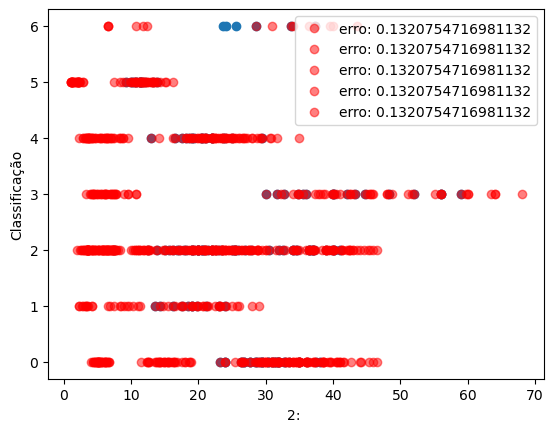

In [115]:
"""
for i in range(len(fish_market_df.columns)):
    X2 = X[:,i]
    plt.xlabel(f"2: {fish_market_df.columns[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X2, y)
    plt.show()
"""
plt.xlabel(f"2: ")
plt.ylabel("Classificação")
plt.scatter(X[:, 0], y)
ypred = model.predict(X)
erro = mean_squared_error(y, ypred)
plt.plot(X, ypred, 'ro', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()


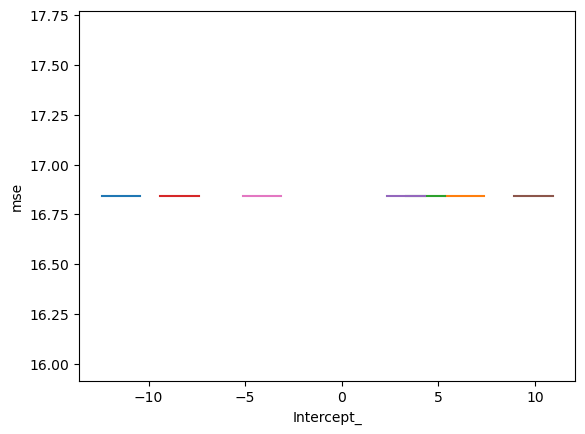

In [138]:
#delta = np.array([-14, -13, -8,-7, -4, -3, 2, 3, 4, 5, 6, 7, 9, 10])
#delta = np.array([-14, -8, -4, 3, 5, 7, 10])
delta = 1
intercepts = np.linspace(intercept_ - delta, intercept_ + delta, 100)
mses = []
for intercept in intercepts:
    model.intercept_ = intercept
    ypred = model.predict(X)
    mse = mean_squared_error(y, ypred)
    #print(mse)
    mses.append(mse)
#plt.title(le.classes_[i])
plt.xlabel("Intercept_")
plt.ylabel("mse")
plt.plot(intercepts, mses)
plt.show()

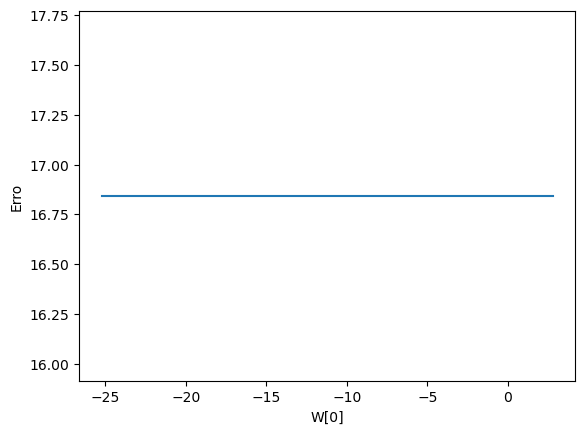

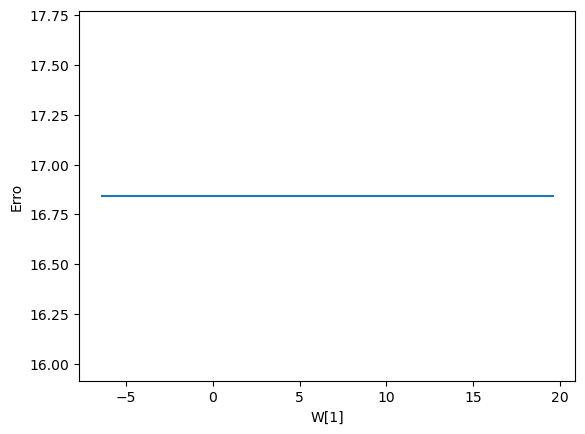

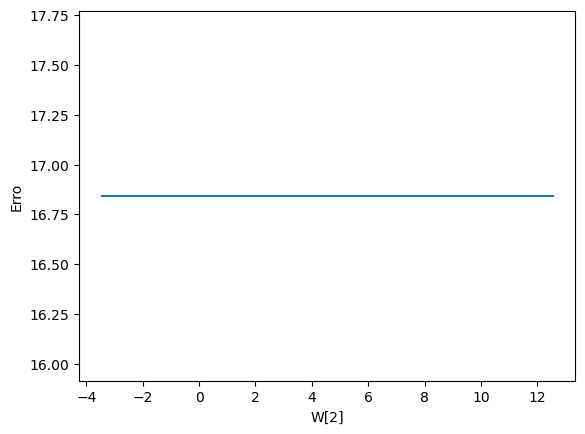

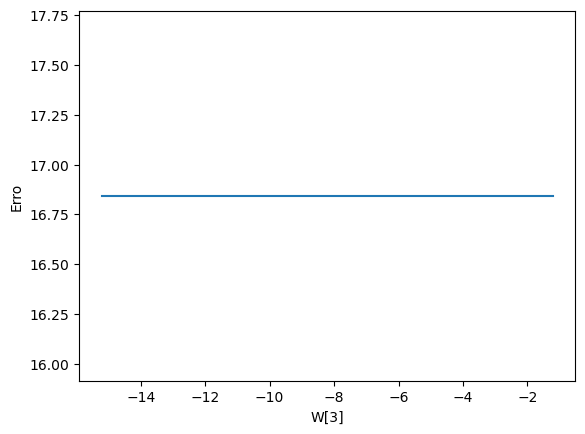

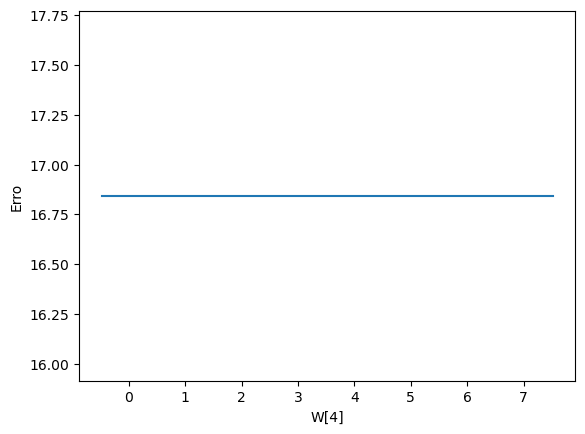

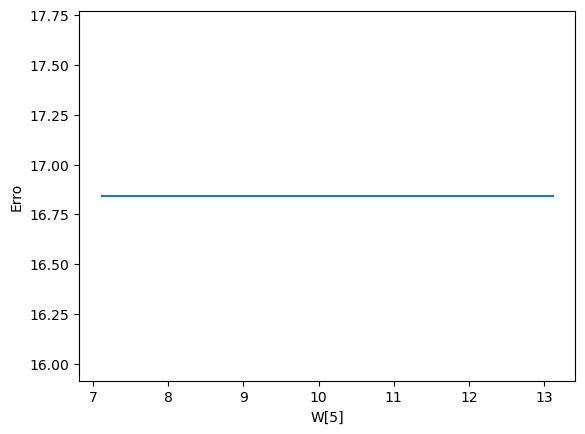

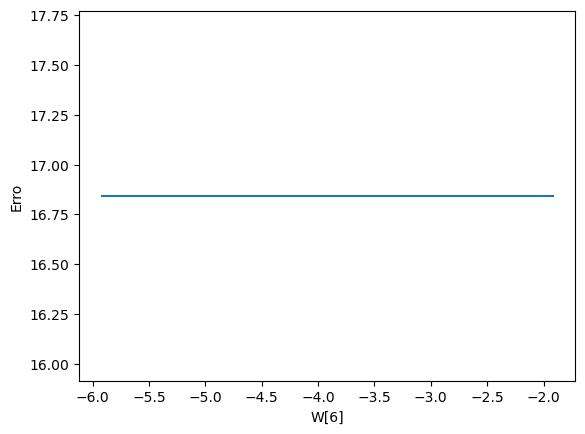

In [128]:
import numpy as np

delta = [-14, -13, -8,-7, -4, -3, 2, 3, 4, 5, 6, 7, 9, 10]

def plot(i):
    erros = []
    intercept_ = model.intercept_[i]
    ws = np.linspace(intercept_-delta[i], intercept_+delta[i], 101)
    for w in ws:
        model.intercept_[i] = w
        ypred = model.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    model.intercept_[i] = intercept_
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws,erros)
    plt.show()

for i in range(len(model.coef_)):
    plot(i)

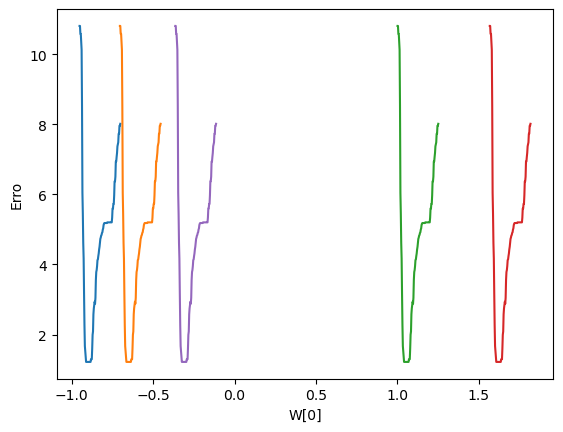

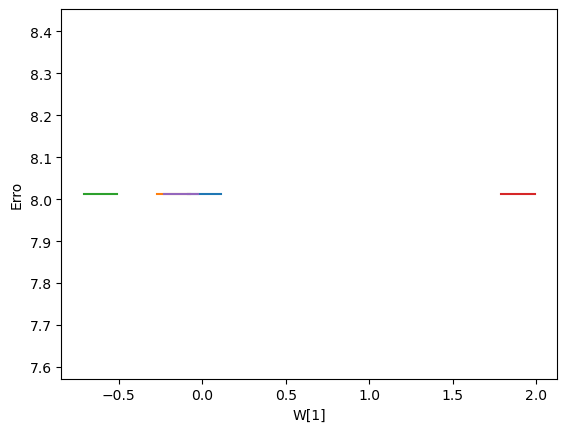

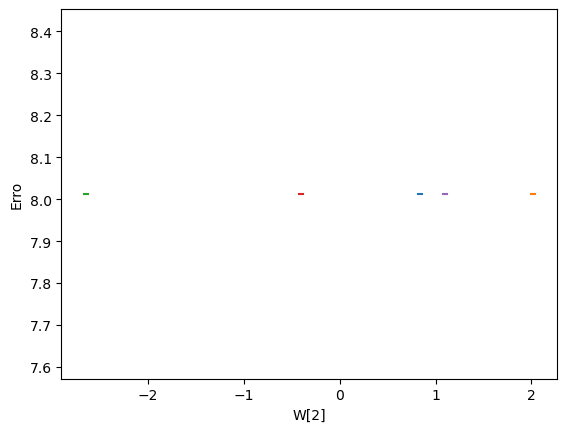

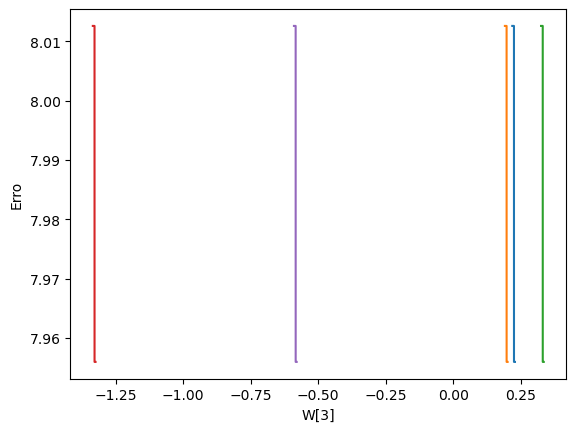

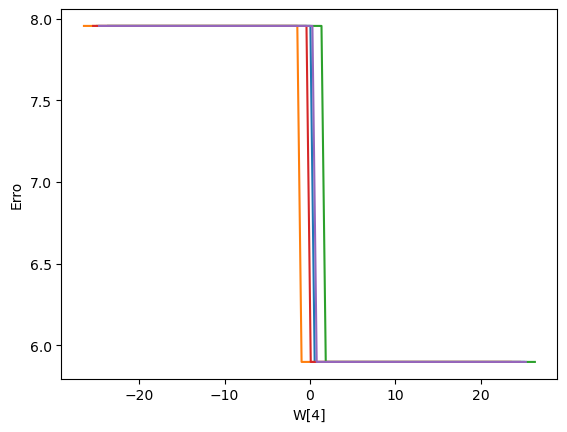

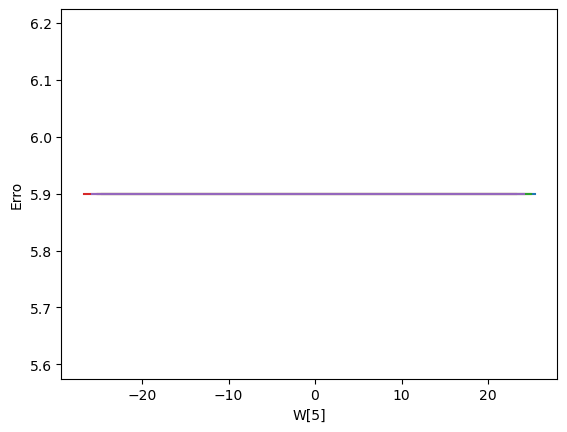

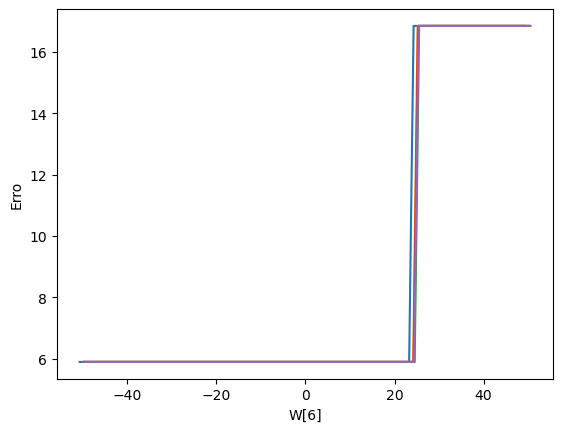

In [117]:
import numpy as np

delta = [0.125, 0.1, 0.02, 0.005, 25, 25, 50, 50, 20, 50, 10, 4, 1, 0.05, 600, 200, 100, 200, 200, 1000, 0.1, 0.1, 0.02, 0.002, 25, 10, 10, 15, 10, 30, 1]

def plot(i):
    erros = []
    coef = model.coef_[i]
    ws = np.linspace(coef-delta[i], coef+delta[i], 101)
    for w in ws:
        model.coef_[i] = w
        ypred = model.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    model.coef_[i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws,erros)
    plt.show()

for i in range(len(model.coef_)):
    plot(i)